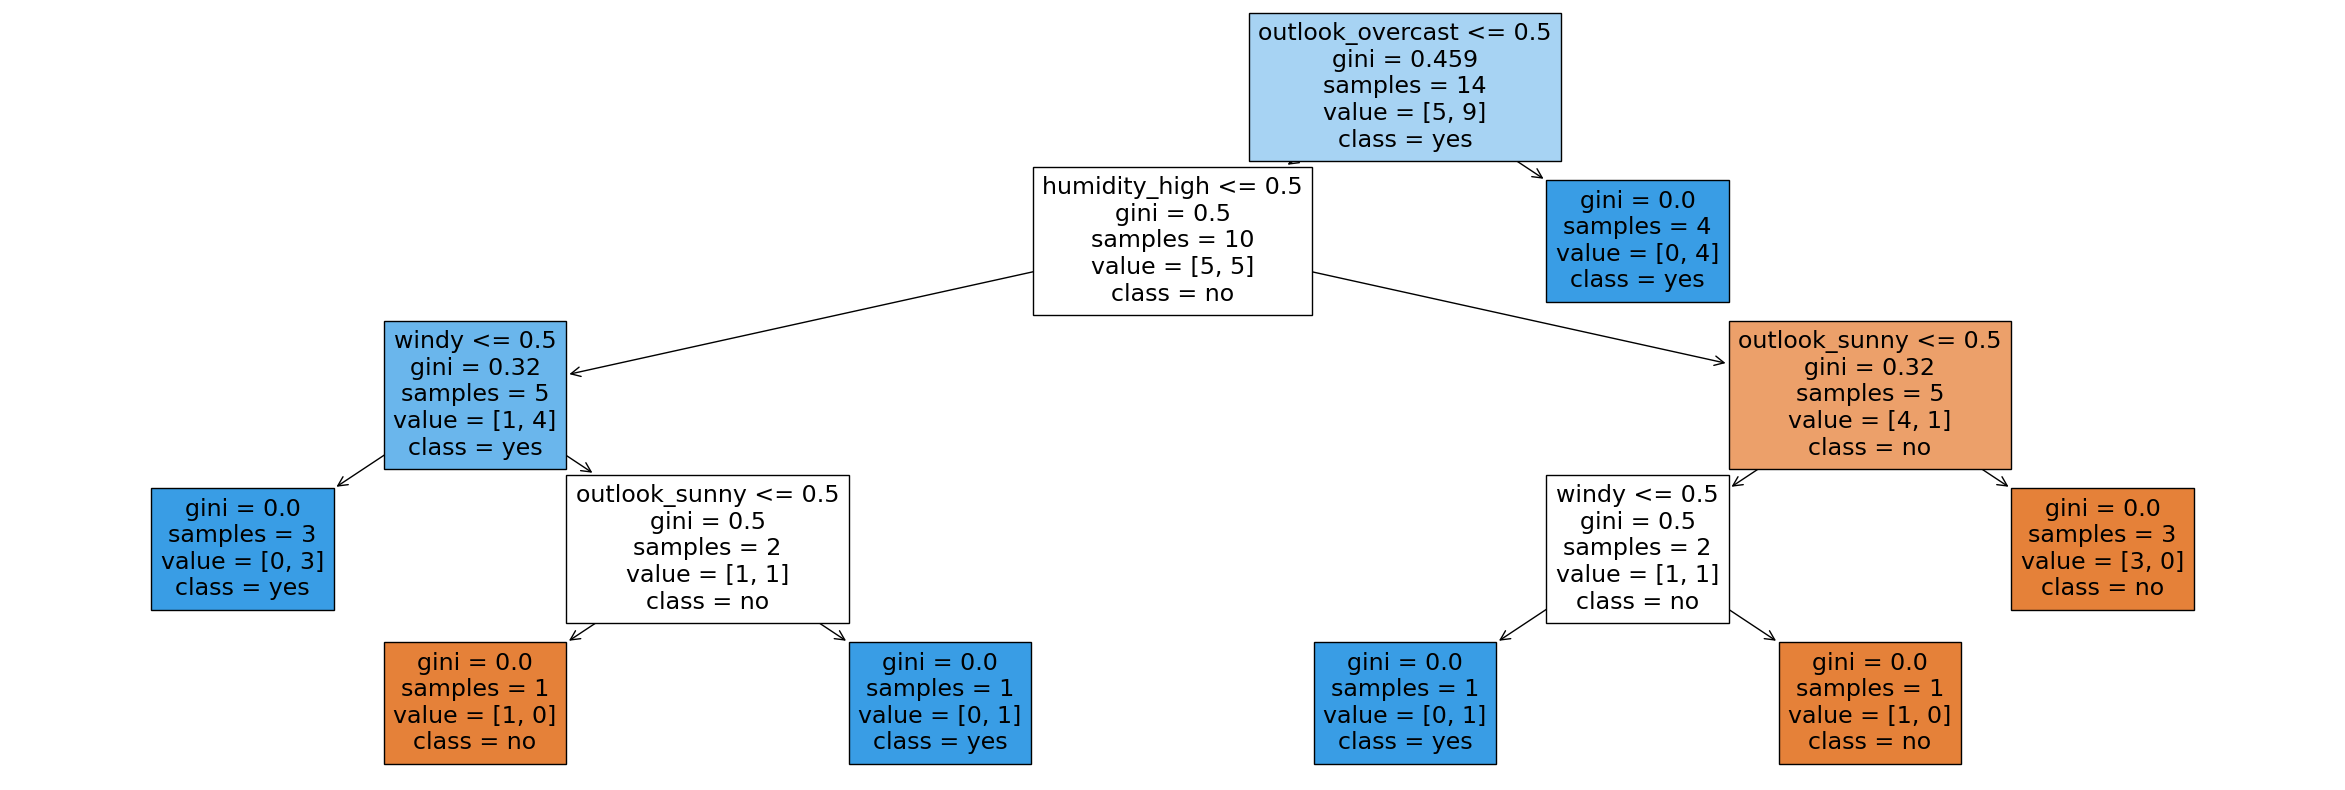

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Load the Data
data = pd.read_csv("practical6.csv")

# Step 2: Preprocess Categorical Variables
# Assuming all features except the target column are categorical
X = data.drop(columns=['play'])  # Features
y = data['play']  # Target

# Convert categorical variables into numerical format using one-hot encoding
X_encoded = pd.get_dummies(X)

# Step 3: Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_encoded, y)

# Step 4: Print Decision Tree
plt.figure(figsize=(30, 10))
plot_tree(dt_classifier, feature_names=X_encoded.columns, class_names=['no', 'yes'], filled=True)
plt.show()


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score (CV Accuracy): 0.6333333333333333
Accuracy on Test Set: 0.6666666666666666


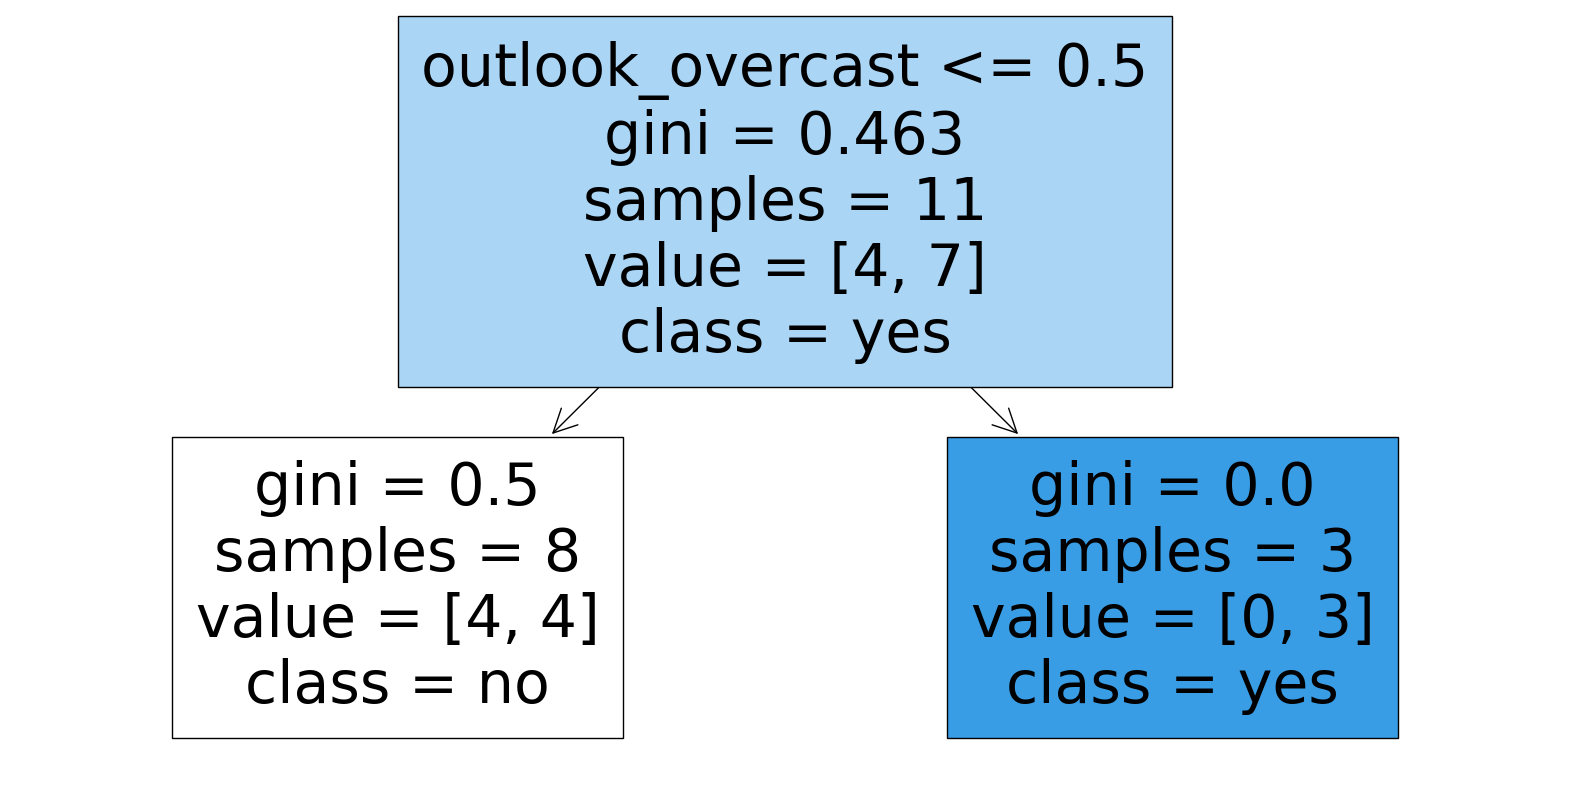

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the Data
data = pd.read_csv("practical6.csv")

# Step 2: Preprocess the Data
X = data.drop(columns=['play'])  # Features
y = data['play']  # Target
X_encoded = pd.get_dummies(X)

# Step 3: Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 4: Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Step 5: Define the Hyperparameter Grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 6: Perform GridSearchCV with K Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 7: Get the Best Model and Evaluate on Test Set
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 8: Print Results
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV Accuracy):", grid_search.best_score_)
print("Accuracy on Test Set:", accuracy)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree of the best parameters
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, feature_names=X_encoded.columns, class_names=['no', 'yes'], filled=True)
plt.show()
